# SCPC 2009 Mobile Payment Analysis Replication in R

In [1]:
library(foreign)
library(memisc)

Warning message:
“package ‘foreign’ was built under R version 3.4.1”Warning message:
“package ‘memisc’ was built under R version 3.4.1”Loading required package: lattice
Loading required package: MASS

Attaching package: ‘memisc’

The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts

The following object is masked from ‘package:base’:

    as.array



In [2]:
scpc2009 = read.dta('SCPC2009.dta')
scpc2009 = scpc2009[,c('r_weight','pa051_a',
                        'pa051_b','pa027_a',
                        'pa027_b','pa027_c',
                        'pa027_d','pa027_e',
                        'pa026','age','edu_lhs',
                        'edu_hs','edu_sc',
                        'edu_c','edu_pgs',
                        'inc_lt25','inc_2549',
                        'inc_5074','inc_7599',
                        'inc_100124','inc_125199',
                        'inc_gt200','white')]
head(scpc2009)
str(scpc2009)

r_weight,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026,age,⋯,edu_c,edu_pgs,inc_lt25,inc_2549,inc_5074,inc_7599,inc_100124,inc_125199,inc_gt200,white
48.40744,2,2,2,2,2,2,2,2,56,⋯,0,0,1,0,0,0,0,0,0,1
19.69351,2,2,2,2,2,2,2,2,64,⋯,0,0,0,1,0,0,0,0,0,1
27.52127,2,2,1,1,2,1,2,1,70,⋯,0,0,0,1,0,0,0,0,0,1
21.77132,2,2,2,2,2,2,2,2,63,⋯,0,0,0,0,0,0,1,0,0,1
12.00401,2,2,2,2,2,2,2,2,52,⋯,0,1,0,0,0,1,0,0,0,1
15.07930,2,2,2,2,2,1,2,2,59,⋯,0,1,0,0,0,0,0,0,1,1


'data.frame':	2173 obs. of  23 variables:
 $ r_weight  : num  48.4 19.7 27.5 21.8 12 ...
 $ pa051_a   : int  2 2 2 2 2 2 2 NA 2 2 ...
 $ pa051_b   : int  2 2 2 2 2 2 2 NA 2 2 ...
 $ pa027_a   : int  2 2 1 2 2 2 2 2 2 2 ...
 $ pa027_b   : int  2 2 1 2 2 2 2 2 2 2 ...
 $ pa027_c   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ pa027_d   : int  2 2 1 2 2 1 2 2 2 2 ...
 $ pa027_e   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ pa026     : int  2 2 1 2 2 2 2 NA 2 1 ...
 $ age       : int  56 64 70 63 52 59 69 75 62 83 ...
 $ edu_lhs   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ edu_hs    : int  1 0 0 0 0 0 0 1 0 0 ...
 $ edu_sc    : int  0 1 1 1 0 0 1 0 1 1 ...
 $ edu_c     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ edu_pgs   : int  0 0 0 0 1 1 0 0 0 0 ...
 $ inc_lt25  : int  1 0 0 0 0 0 0 0 1 0 ...
 $ inc_2549  : int  0 1 1 0 0 0 1 1 0 1 ...
 $ inc_5074  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ inc_7599  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ inc_100124: int  0 0 0 1 0 0 0 0 0 0 ...
 $ inc_125199: int  0 0 0 0 0 0 0 0 0 0 ...
 $ inc_gt200 : int

# MOBILE PAYMENTS VARIABLES - mpay

In [3]:
scpc2009$pa051_a[scpc2009$pa051_a==2] = 0
scpc2009$pa051_b[scpc2009$pa051_b==2] = 0
scpc2009$mpay = scpc2009$pa051_a + scpc2009$pa051_b
summary(scpc2009$mpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.02482 0.00000 2.00000     199 

In [4]:
scpc2009$mpay[scpc2009$mpay==2] = 1
table(scpc2009$mpay)


   0    1 
1929   45 

# CONTACTLESS PAYMENT VARIABLE - cpay

In [5]:
scpc2009$pa027_a[scpc2009$pa027_a==2] = 0
scpc2009$pa027_b[scpc2009$pa027_b==2] = 0
scpc2009$pa027_c[scpc2009$pa027_c==2] = 0
scpc2009$pa027_d[scpc2009$pa027_d==2] = 0
scpc2009$pa027_e[scpc2009$pa027_e==2] = 0
scpc2009$cpay = scpc2009$pa027_a + scpc2009$pa027_b + 
    scpc2009$pa027_c + scpc2009$pa027_d + scpc2009$pa027_e
summary(scpc2009$cpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3029  0.0000  5.0000      17 

In [6]:
scpc2009$cpay[scpc2009$cpay >= 1] = 1
summary(scpc2009$cpay)
table(scpc2009$cpay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.2277  0.0000  1.0000      17 


   0    1 
1665  491 

# MOBILE BANKING VARIABLE - mbank

In [7]:
scpc2009$pa026[scpc2009$pa026==2] = 0
scpc2009$mbank = scpc2009$pa026
summary(scpc2009$mbank)
table(scpc2009$mbank)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.00000 0.00000 0.09746 0.00000 1.00000     285 


   0    1 
1704  184 

# AGE VARIABLE - age

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   41.00   52.00   50.89   61.00   90.00       1 

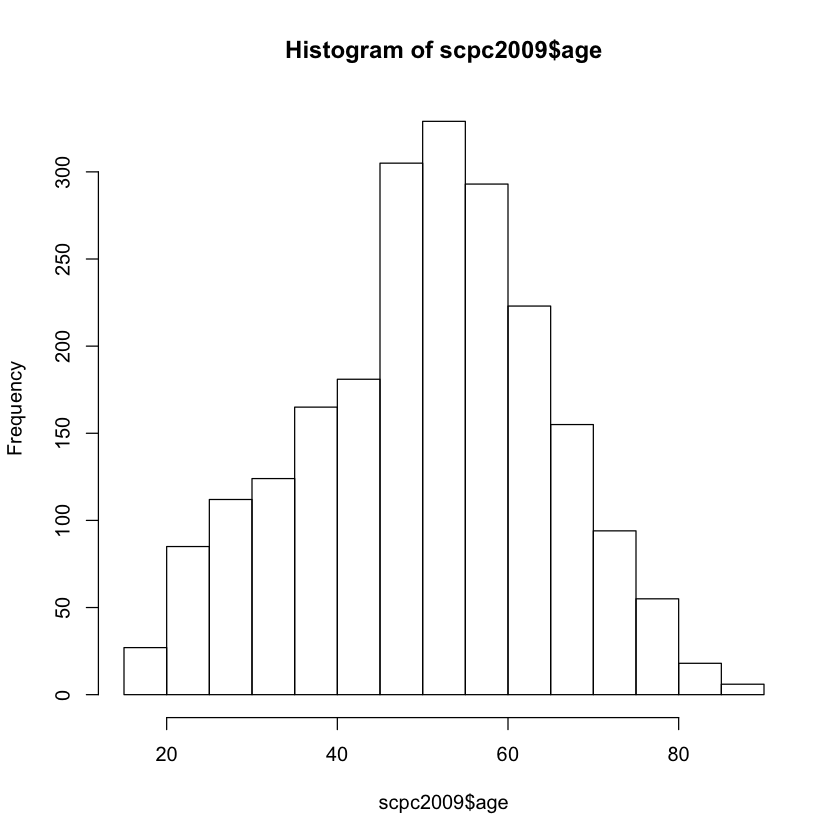

In [8]:
summary(scpc2009$age)
hist(scpc2009$age)

In [30]:
scpc2009$agecat = scpc2009$age

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   4.000   4.098   5.000   6.000       1 


  1   2   3   4   5   6 
 95 231 320 615 543 368 

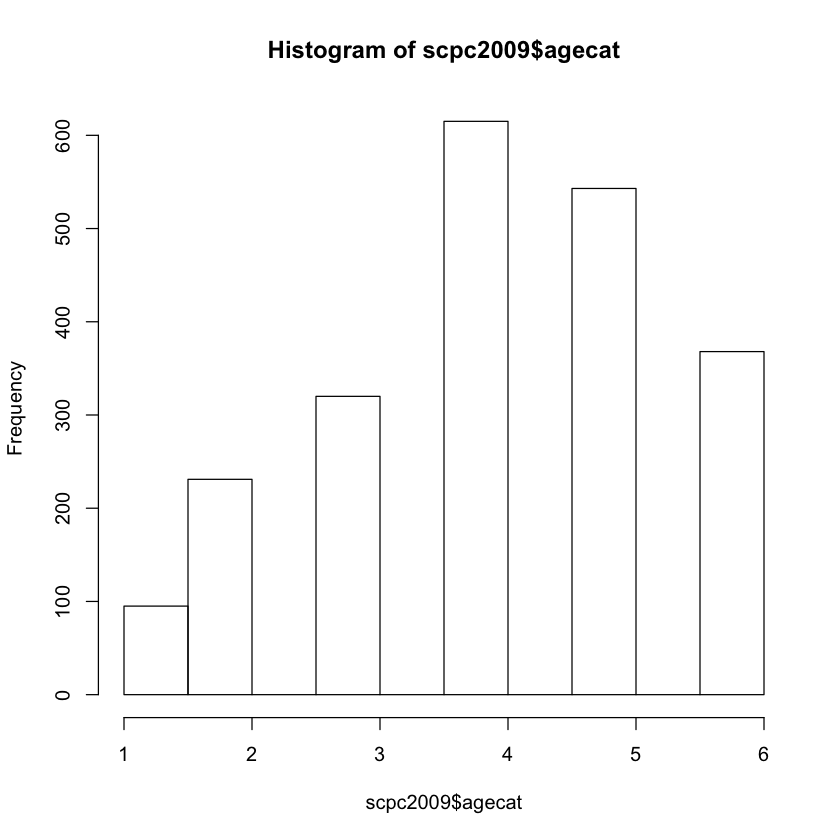

In [31]:
scpc2009$agecat[scpc2009$agecat<=24] = 1
scpc2009$agecat[scpc2009$agecat>24 & 
                 scpc2009$agecat<=34] = 2
scpc2009$agecat[scpc2009$agecat>34 & 
                 scpc2009$agecat<=44] = 3
scpc2009$agecat[scpc2009$agecat>44 & 
                 scpc2009$agecat<=54] = 4
scpc2009$agecat[scpc2009$agecat>54 & 
                 scpc2009$agecat<=64] = 5
scpc2009$agecat[scpc2009$agecat>64] = 6

summary(scpc2009$agecat)
table(scpc2009$agecat)
hist(scpc2009$agecat)

# EDUCATION VARIABLE - edlevel

In [15]:
scpc2009$edu_lhs[scpc2009$edu_lhs==2] = 0
summary(scpc2009$edu_lhs)
table(scpc2009$edu_lhs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01887 0.00000 1.00000 


   0    1 
2132   41 

In [16]:
scpc2009$edu_hs[scpc2009$edu_hs==2] = 0
scpc2009$edu_hs[scpc2009$edu_hs==1] = 2
summary(scpc2009$edu_hs)
table(scpc2009$edu_hs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3046  0.0000  2.0000 


   0    2 
1842  331 

In [17]:
scpc2009$edu_sc[scpc2009$edu_sc==2] = 0
scpc2009$edu_sc[scpc2009$edu_sc==1] = 3
summary(scpc2009$edu_sc)
table(scpc2009$edu_sc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.075   3.000   3.000 


   0    3 
1394  779 

In [18]:
scpc2009$edu_c[scpc2009$edu_c==2] = 0
scpc2009$edu_c[scpc2009$edu_c==1] = 4
summary(scpc2009$edu_c)
table(scpc2009$edu_c)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.051   4.000   4.000 


   0    4 
1602  571 

In [19]:
scpc2009$edu_pgs[scpc2009$edu_pgs==2] = 0
scpc2009$edu_pgs[scpc2009$edu_pgs==1] = 5
summary(scpc2009$edu_pgs)
table(scpc2009$edu_pgs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.038   0.000   5.000 


   0    5 
1722  451 

In [20]:
scpc2009$edlevel = scpc2009$edu_lhs + scpc2009$edu_hs +
    scpc2009$edu_sc + scpc2009$edu_c + scpc2009$edu_pgs
summary(scpc2009$edlevel)
table(scpc2009$edlevel)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.488   4.000   5.000 


  1   2   3   4   5 
 41 331 779 571 451 

# INCOME LEVEL VARIABLE - income

In [21]:
scpc2009$inc_lt25[scpc2009$inc_lt25==2] = 0
scpc2009$inc_lt25[scpc2009$inc_lt25==1] = 1
summary(scpc2009$inc_lt25)
table(scpc2009$inc_lt25)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.1352  0.0000  1.0000       6 


   0    1 
1874  293 

In [22]:
scpc2009$inc_2549[scpc2009$inc_2549==2] = 0
scpc2009$inc_2549[scpc2009$inc_2549==1] = 2
summary(scpc2009$inc_2549)
table(scpc2009$inc_2549)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.5159  2.0000  2.0000       6 


   0    2 
1608  559 

In [23]:
scpc2009$inc_5074[scpc2009$inc_5074==2] = 0
scpc2009$inc_5074[scpc2009$inc_5074==1] = 3
summary(scpc2009$inc_5074)
table(scpc2009$inc_5074)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.7531  3.0000  3.0000       6 


   0    3 
1623  544 

In [24]:
scpc2009$inc_7599[scpc2009$inc_7599==2] = 0
scpc2009$inc_7599[scpc2009$inc_7599==1] = 4
summary(scpc2009$inc_7599)
table(scpc2009$inc_7599)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.6294  0.0000  4.0000       6 


   0    4 
1826  341 

In [25]:
scpc2009$inc_100124[scpc2009$inc_100124==2] = 0
scpc2009$inc_100124[scpc2009$inc_100124==1] = 5
summary(scpc2009$inc_100124)
table(scpc2009$inc_100124)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3646  0.0000  5.0000       6 


   0    5 
2009  158 

In [26]:
scpc2009$inc_125199[scpc2009$inc_125199==2] = 0
scpc2009$inc_125199[scpc2009$inc_125199==1] = 6
summary(scpc2009$inc_125199)
table(scpc2009$inc_125199)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.5122  0.0000  6.0000       6 


   0    6 
1982  185 

In [27]:
scpc2009$inc_gt200[scpc2009$inc_gt200==2] = 0
scpc2009$inc_gt200[scpc2009$inc_gt200==1] = 7
summary(scpc2009$inc_gt200)
table(scpc2009$inc_gt200)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.281   0.000   7.000       6 


   0    7 
2080   87 

In [28]:
scpc2009$income = scpc2009$inc_lt25 + scpc2009$inc_2549 +
    scpc2009$inc_5074 + scpc2009$inc_7599 + scpc2009$inc_100124 +
    scpc2009$inc_125199 + scpc2009$inc_gt200
summary(scpc2009$income)
table(scpc2009$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.000   3.000   3.192   4.000   7.000       6 


  1   2   3   4   5   6   7 
293 559 544 341 158 185  87 

# Race Dummy Variable for White - white

In [29]:
scpc2009$white[scpc2009$white==2] = 0
summary(scpc2009$white)
table(scpc2009$white)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8762  1.0000  1.0000 


   0    1 
 269 1904 

# New Dataframe with Coded Variables

In [32]:
df = scpc2009[,c('r_weight','mpay','cpay','mbank',
                  'agecat','edlevel','income','white')]
str(df)
head(df)
summary(df)

'data.frame':	2173 obs. of  8 variables:
 $ r_weight: num  48.4 19.7 27.5 21.8 12 ...
 $ mpay    : num  0 0 0 0 0 0 0 NA 0 0 ...
 $ cpay    : num  0 0 1 0 0 1 0 0 0 0 ...
 $ mbank   : num  0 0 1 0 0 0 0 NA 0 1 ...
 $ agecat  : num  5 5 6 5 4 5 6 6 5 6 ...
 $ edlevel : num  2 3 3 3 5 5 3 2 3 3 ...
 $ income  : num  1 2 2 5 4 7 2 2 1 2 ...
 $ white   : num  1 1 1 1 1 1 0 1 1 1 ...


r_weight,mpay,cpay,mbank,agecat,edlevel,income,white
48.40744,0,0,0,5,2,1,1
19.69351,0,0,0,5,3,2,1
27.52127,0,1,1,6,3,2,1
21.77132,0,0,0,5,3,5,1
12.00401,0,0,0,4,5,4,1
15.07930,0,1,0,5,5,7,1


    r_weight           mpay             cpay            mbank        
 Min.   : 10.19   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 19.27   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 26.61   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 45.90   Mean   :0.0228   Mean   :0.2277   Mean   :0.09746  
 3rd Qu.: 48.91   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :776.70   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
                  NA's   :199      NA's   :17       NA's   :285      
     agecat         edlevel          income          white       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:1.0000  
 Median :4.000   Median :3.000   Median :3.000   Median :1.0000  
 Mean   :4.098   Mean   :3.488   Mean   :3.192   Mean   :0.8762  
 3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:1.0000  
 Max.   :6.000   Max.   :5.000   Max.   :7.0

# Logistic Regression

In [33]:
head(df)

r_weight,mpay,cpay,mbank,agecat,edlevel,income,white
48.40744,0,0,0,5,2,1,1
19.69351,0,0,0,5,3,2,1
27.52127,0,1,1,6,3,2,1
21.77132,0,0,0,5,3,5,1
12.00401,0,0,0,4,5,4,1
15.07930,0,1,0,5,5,7,1


In [36]:
fit1 = glm(mpay ~ cpay + mbank + agecat + 
            edlevel + income + white, 
             data = df, family = binomial)

In [37]:
summary(fit1)


Call:
glm(formula = mpay ~ cpay + mbank + agecat + edlevel + income + 
    white, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2797  -0.1912  -0.1159  -0.0917   3.2576  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.62636    0.78174  -3.360  0.00078 ***
cpay         1.71908    0.35813   4.800 1.59e-06 ***
mbank        1.75729    0.36290   4.842 1.28e-06 ***
agecat      -0.24200    0.12593  -1.922  0.05464 .  
edlevel     -0.31201    0.19115  -1.632  0.10262    
income      -0.02934    0.11674  -0.251  0.80157    
white       -0.41136    0.40712  -1.010  0.31229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 386.81  on 1871  degrees of freedom
Residual deviance: 308.81  on 1865  degrees of freedom
  (301 observations deleted due to missingness)
AIC: 322.81

Number of Fisher Scoring iterations: 

In [38]:
confint(fit1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-4.1919064,-1.120360750
cpay,1.0329950,2.448593963
mbank,1.0391558,2.469401064
agecat,-0.4929909,0.002527805
edlevel,-0.6905026,0.060914482
income,-0.2642547,0.195223497
white,-1.1796877,0.427730320


In [39]:
library(Zelig)

Warning message:
“package ‘Zelig’ was built under R version 3.4.1”Loading required package: survival


In [40]:
fit2 = zelig(mpay ~ cpay + mbank + agecat + 
              edlevel + income + white,
              data = df, model = "relogit")

How to cite this model in Zelig:
  Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau. 2017.
  relogit: Rare Events Logistic Regression for Dichotomous Dependent Variables
  in Christine Choirat, Christopher Gandrud, James Honaker, Kosuke Imai, Gary King, and Olivia Lau,
  "Zelig: Everyone's Statistical Software," http://zeligproject.org/


In [41]:
summary(fit2)

Model: 

Call:
z5$zelig(formula = mpay ~ cpay + mbank + agecat + edlevel + income + 
    white, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2960  -0.2004  -0.1219  -0.0975   3.2222  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.55782    0.78174  -3.272  0.00107
cpay         1.68642    0.35813   4.709 2.49e-06
mbank        1.73749    0.36290   4.788 1.69e-06
agecat      -0.23595    0.12593  -1.874  0.06098
edlevel     -0.30442    0.19115  -1.593  0.11126
income      -0.02564    0.11674  -0.220  0.82616
white       -0.43228    0.40712  -1.062  0.28832

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 386.81  on 1871  degrees of freedom
Residual deviance: 308.81  on 1865  degrees of freedom
  (301 observations deleted due to missingness)
AIC: 322.81

Number of Fisher Scoring iterations: 7

Next step: Use 'setx' method


In [42]:
fit2x = setx(fit2)

In [43]:
fit2s = sim(fit2, x=fit2x)
summary(fit2s)


 sim x :
 -----
ev
           mean          sd        50%        2.5%      97.5%
[1,] 0.01122778 0.002746019 0.01085284 0.006704047 0.01716308
pv
         0     1
[1,] 0.993 0.007


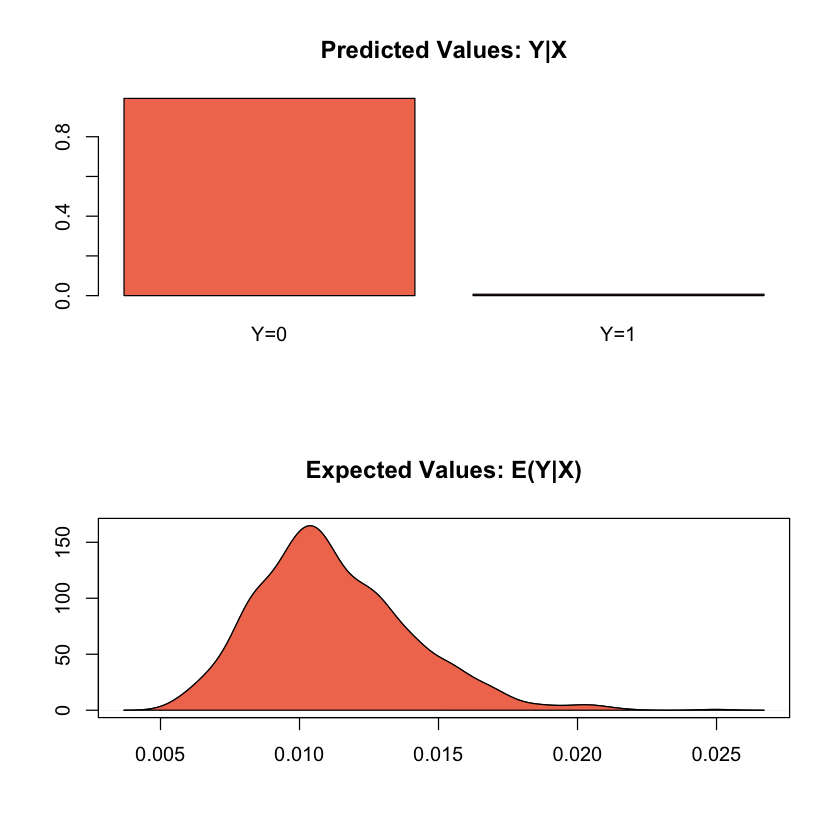

In [44]:
plot(fit2s)